# Medical Insurance Cost Prediction using Machine Learning with Python

****To develop the best medical insurance products, the insurer need access to historical data to approximate the medical costs of each user. With this data, a medical insurer can develop more accurate pricing models, plan a particular insurance outcome, or manage a big portfolios. For all these cases, the objective is to accurately predict insurance costs.****

###  Dataset

This dataset contains 1,339 medical insurance records. The individual medical costs billed by health insurance are the target variable charges, and the rest of columns contain personal information such as age, gender, family status, and whether the patient smokes among other features.

### Use Case

The objective is to train a ML regression model that generates the target column charges more accurately. Being a regression model problem, metrics such as the coefficient of determination and the mean squared error are used to evaluate the model.

## Work Flow

### Import Libraries

In [3]:
#Importing dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics


### Data Collection & Analysis

In [4]:
# Loading the dataset from csv file to pandas DataFrame

df = pd.read_csv('insurance.csv')


In [5]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
# Numer of rows & columns
df.shape

(1338, 7)

In [7]:
# Getting info about Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


**Categorical Features**

* Sex
* Smoker
* region

In [8]:
#Checking null values

df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

### Data Analysis

In [9]:
# Statistical Measures of the dataset

df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


F:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


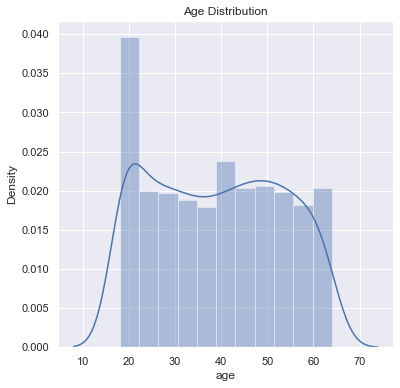

In [10]:
# Distribution of age value
sns.set()
plt.figure(figsize = (6,6))
sns.distplot(df['age'])
plt.title('Age Distribution')
plt.show()

* At 20, we have alot of values
* almost noramlly distributed

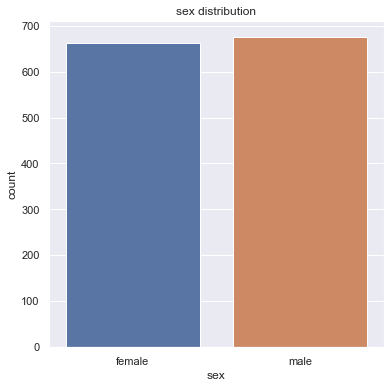

In [11]:
# Gender colum
plt.figure(figsize = (6,6))
sns.countplot(x = 'sex' , data = df)
plt.title('sex distribution')
plt.show()

In [12]:
df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

F:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


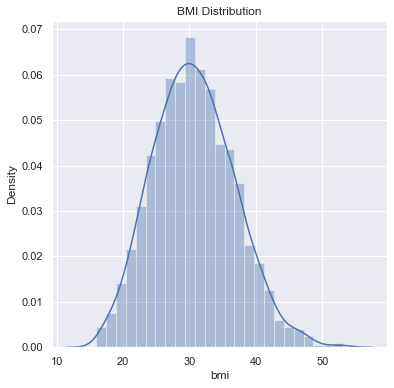

In [13]:
#bmi distribution

sns.set()
plt.figure(figsize = (6,6))
sns.distplot(df['bmi'])
plt.title('BMI Distribution')
plt.show()

* For most adults, an ideal BMI is in the 18.5 to 24.9 range.
* most of the poeple in the graph shown is between 20 to 40 , means they are over weight

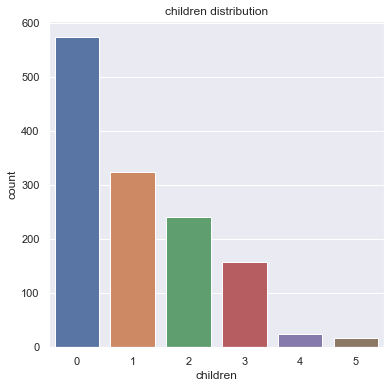

In [14]:
plt.figure(figsize = (6,6))
sns.countplot(x = 'children' , data = df)
plt.title('children distribution')
plt.show()

In [15]:
df['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

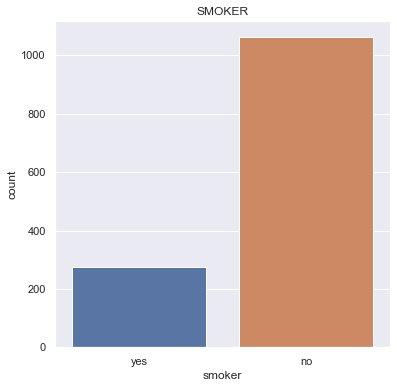

In [16]:
plt.figure(figsize = (6,6))
sns.countplot(x = 'smoker' , data = df)
plt.title('SMOKER')
plt.show()

In [17]:
df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

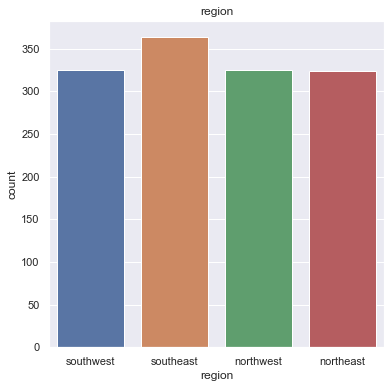

In [18]:
plt.figure(figsize = (6,6))
sns.countplot(x = 'region' , data = df)
plt.title('region')
plt.show()

In [19]:
df['region'].value_counts()

southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64

F:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


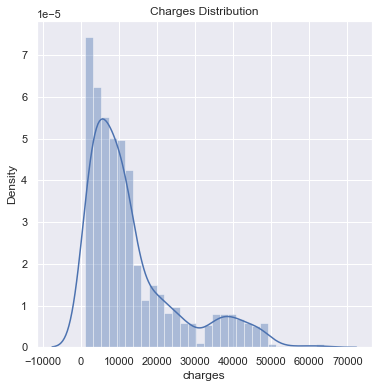

In [20]:
plt.figure(figsize = (6,6))
sns.distplot(df['charges'])
plt.title('Charges Distribution')
plt.show()

# Data Preprocessing

* since we have some categorical features like: sex, smoker, region--- we will assing numerical values to these categorical values

* Encoding categorical features

In [21]:
# Encoding the sex colum

df.replace({'sex':{'male':1, 'female':0}}, inplace = True)

# Encoding the smoker colum

df.replace({'smoker':{'yes':1, 'no':0}}, inplace = True)

#Encoding the region colum

df.replace({'region':{'southeast':0, 'southwest':1, 'northeast':2, 'northwest':3}}, inplace = True)

## Spliting the features and Target labels

In [22]:
X = df.drop( columns ='charges', axis = 1)
y = df['charges']

In [23]:
print(X)

      age  sex     bmi  children  smoker  region
0      19    0  27.900         0       1       1
1      18    1  33.770         1       0       0
2      28    1  33.000         3       0       0
3      33    1  22.705         0       0       3
4      32    1  28.880         0       0       3
...   ...  ...     ...       ...     ...     ...
1333   50    1  30.970         3       0       3
1334   18    0  31.920         0       0       2
1335   18    0  36.850         0       0       0
1336   21    0  25.800         0       0       1
1337   61    0  29.070         0       1       3

[1338 rows x 6 columns]


In [24]:
print(y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


# SPliting the data into Training data and testing data

In [25]:
Xtrain, Xtest, ytrain, ytest = train_test_split (X, y, test_size= 0.2, random_state =2)

In [26]:
print(X.shape, Xtrain.shape, Xtest.shape)

(1338, 6) (1070, 6) (268, 6)


In [27]:
Xtrain.shape

(1070, 6)

In [28]:
Xtest.shape

(268, 6)

In [29]:
ytrain.shape

(1070,)

### Model Training

In [30]:
regressor = LinearRegression()

In [31]:
regressor.fit(Xtrain,ytrain)

LinearRegression()

### Model Evaluation

In [32]:
training_data_prediction = regressor.predict(Xtrain)

In [33]:
training_data_prediction

array([  478.49404197,  9317.75369733, 13193.79859142, ...,
       17327.55442479,  9600.51860822, 13753.18970971])

In [34]:
#R sq value--- btween 0 - 1 - if the value is closed to on e- the model is performing well

r2_train = metrics.r2_score(ytrain, training_data_prediction)

In [35]:
r2_train

0.751505643411174

In [38]:
## Building Predictive system


input_data = ( [19, 1, 27, 0, 1, 1])

inputToNumpyArray= np.array(input_data)

#reshape the array
inputreshape = inputToNumpyArray.reshape(1,-1)

prediction = regressor.predict(inputreshape)

print(prediction)

[25274.0405194]


F:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
